In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime

In [ ]:
Airlines = pd.read_excel("Airlines+Data.xlsx")

# EDA

In [ ]:
Airlines.head(20)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [ ]:
Airlines.rename({'Month':'Date'},axis=1, inplace=True)

In [ ]:
Airlines["Date"] = pd.to_datetime(Airlines.Date,format="%b-%y")
Airlines["month"] = Airlines.Date.dt.strftime("%b")
Airlines["year"] = Airlines.Date.dt.strftime("%Y")
Airlines.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


In [ ]:
Airlines.nunique()

Date          96
Passengers    80
month         12
year           8
dtype: int64

In [ ]:
Airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
Airlines[Airlines.duplicated()]

,Date,Passengers,month,year


# Visualization

Text(0.5, 1.0, 'Passenger in each month ')

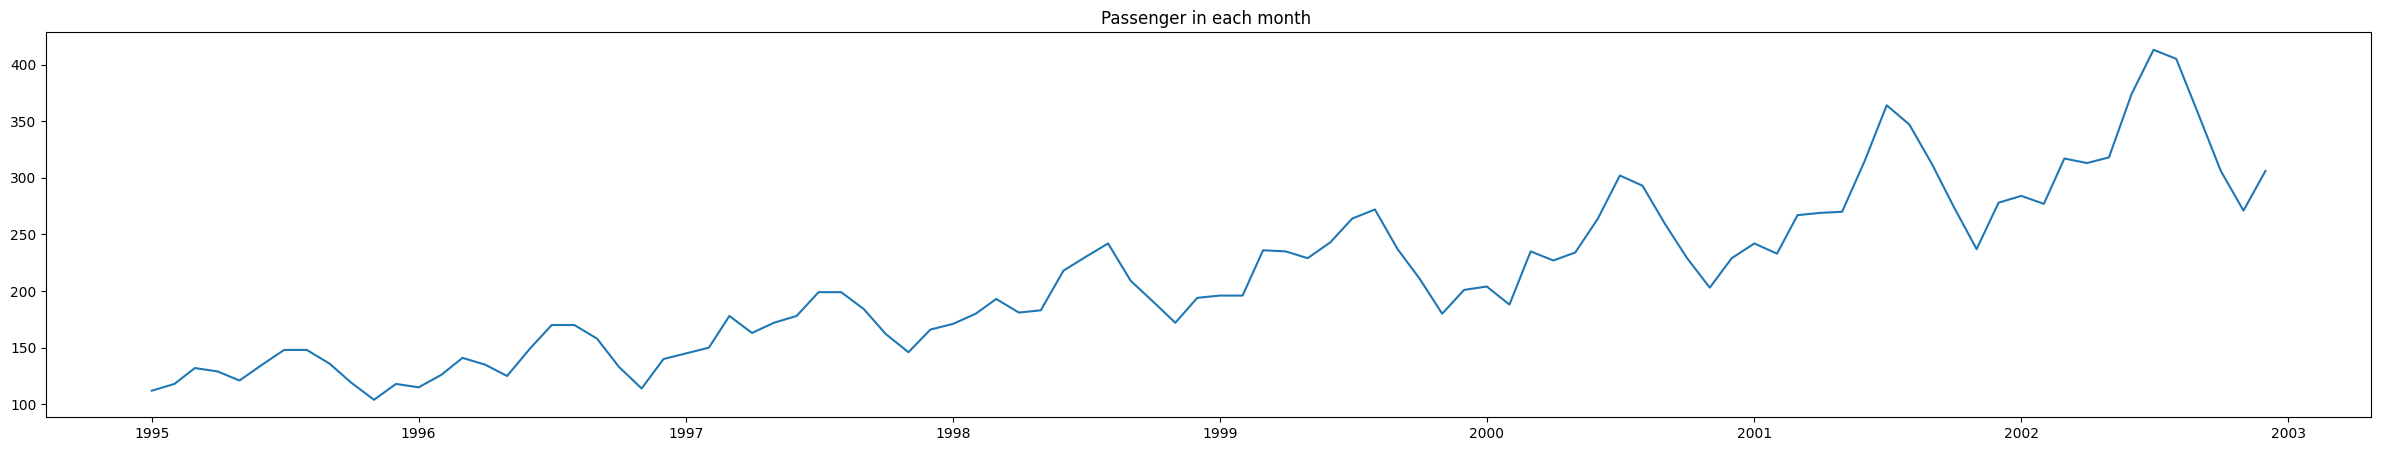

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(Airlines["Date"],Airlines["Passengers"])
plt.title("Passenger in each month ")

<Axes: xlabel='month', ylabel='year'>

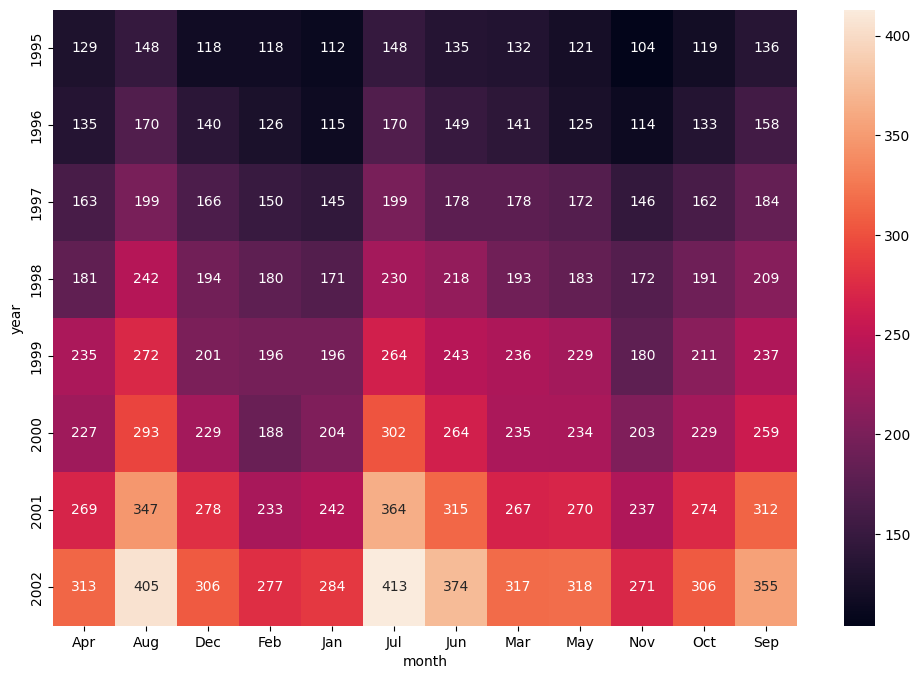

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines, values="Passengers", index="year", columns="month", aggfunc="mean")
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: ylabel='Density'>

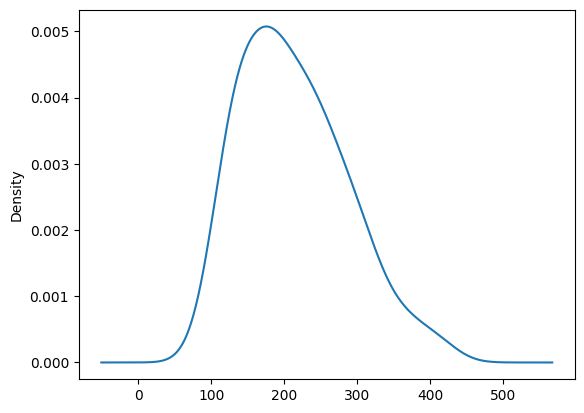

In [ ]:
Airlines["Passengers"].plot(kind='kde')

# Train-Test Split

In [ ]:
Train=Airlines.head(80)
Test=Airlines.tail(16)

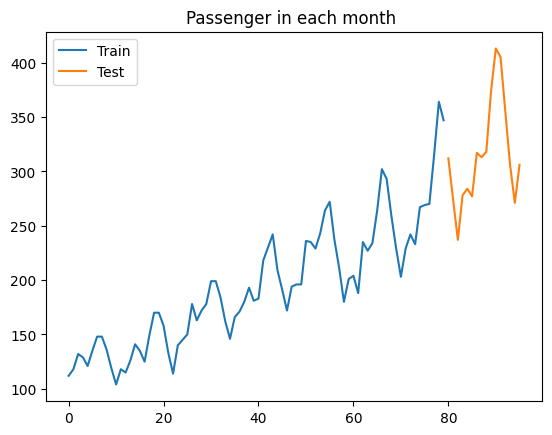

In [ ]:
plt.title("Passenger in each month ")
plt.plot(Train["Passengers"],label="Train")
plt.plot(Test["Passengers"],label="Test")
plt.legend(loc="best")

# Naive Model/Simple Model

In [ ]:
time=Airlines["Date"]

<Axes: xlabel='y(t)', ylabel='y(t + 4)'>

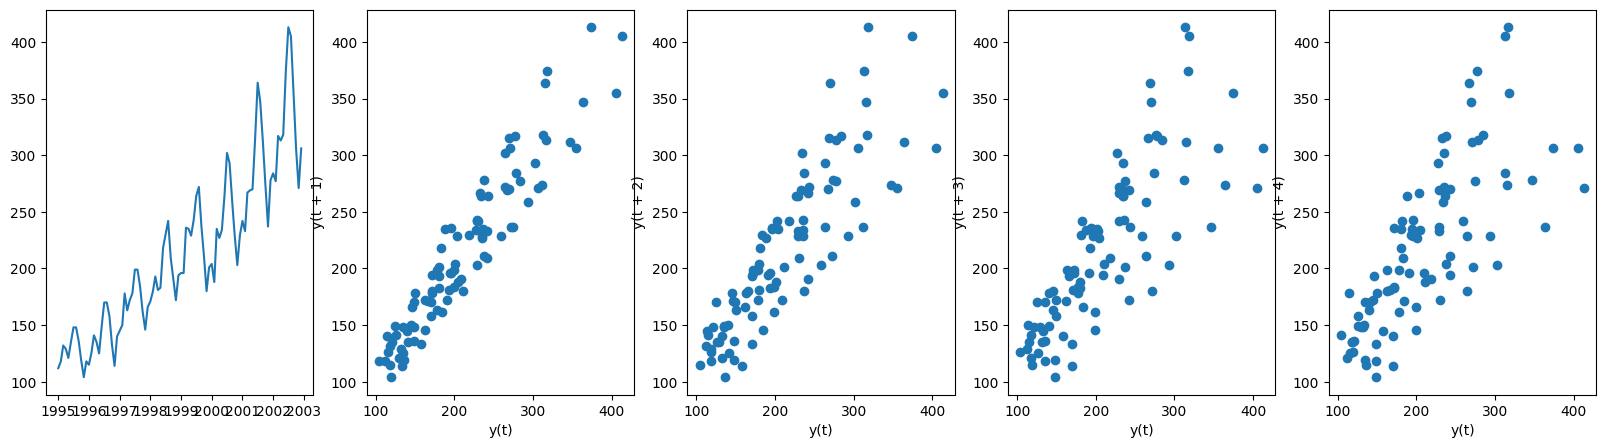

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].plot(time,Airlines["Passengers"])
pd.plotting.lag_plot(Airlines["Passengers"], lag= 1, ax =ax[1])
pd.plotting.lag_plot(Airlines["Passengers"], lag= 2, ax =ax[2])
pd.plotting.lag_plot(Airlines["Passengers"], lag= 3, ax =ax[3])
pd.plotting.lag_plot(Airlines["Passengers"], lag= 4, ax =ax[4])

# Data Based Forecasting Models

# MOVING AVERAGE

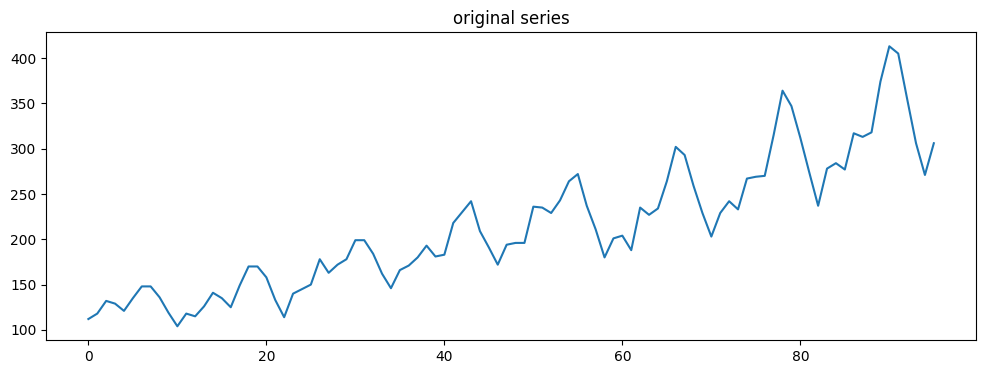

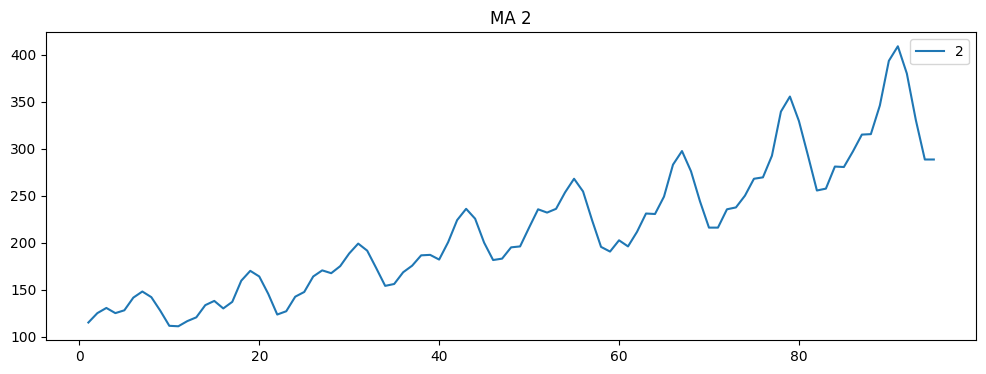

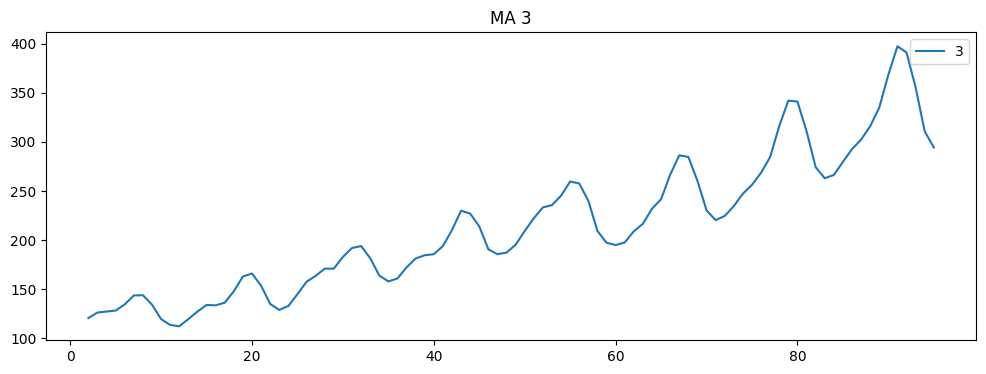

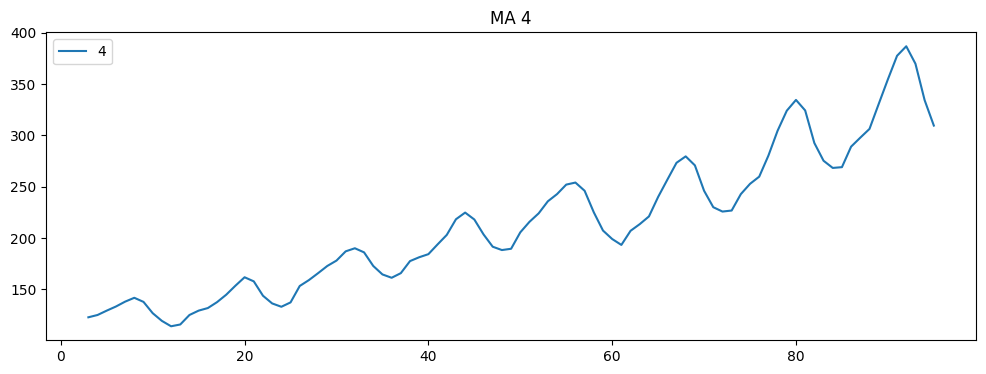

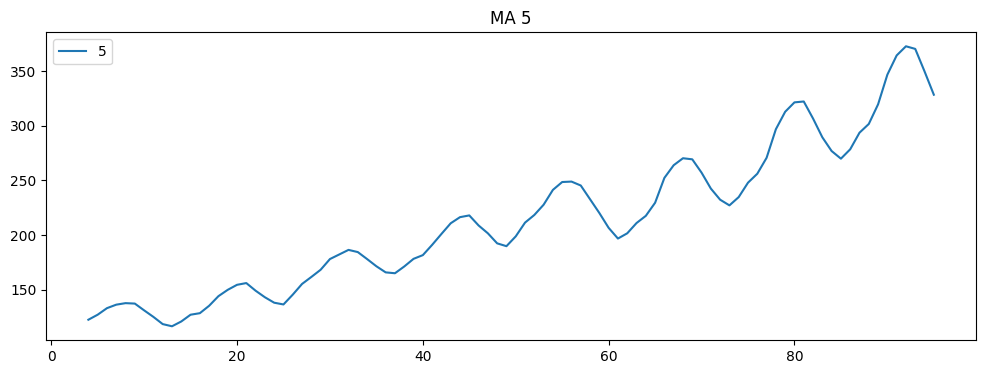

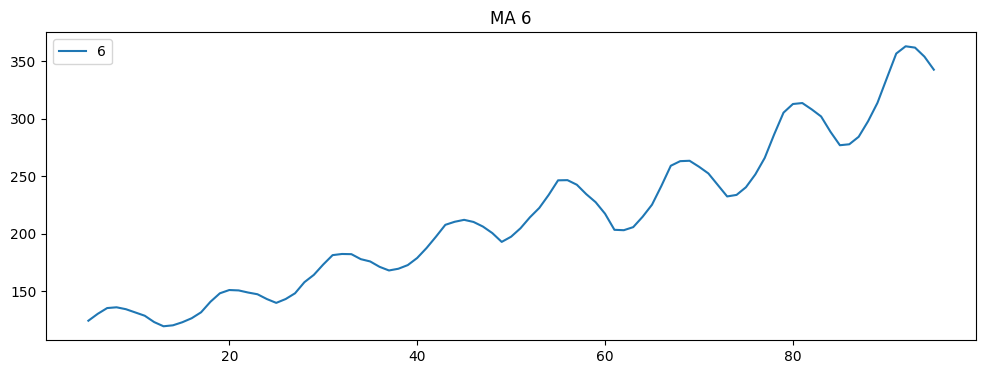

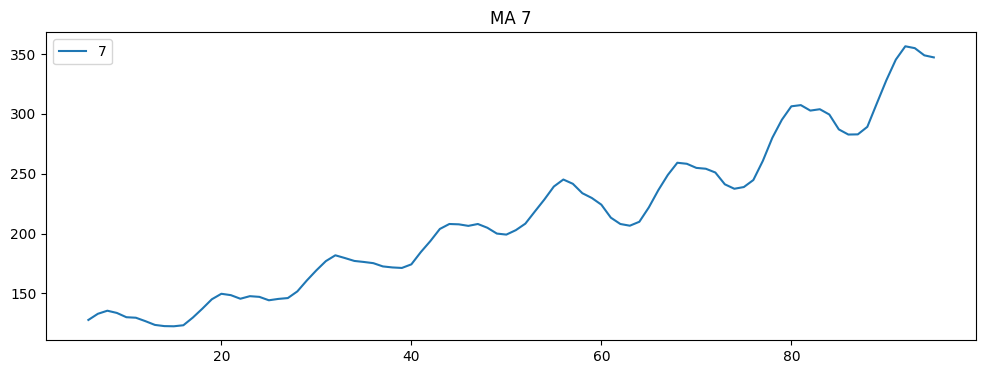

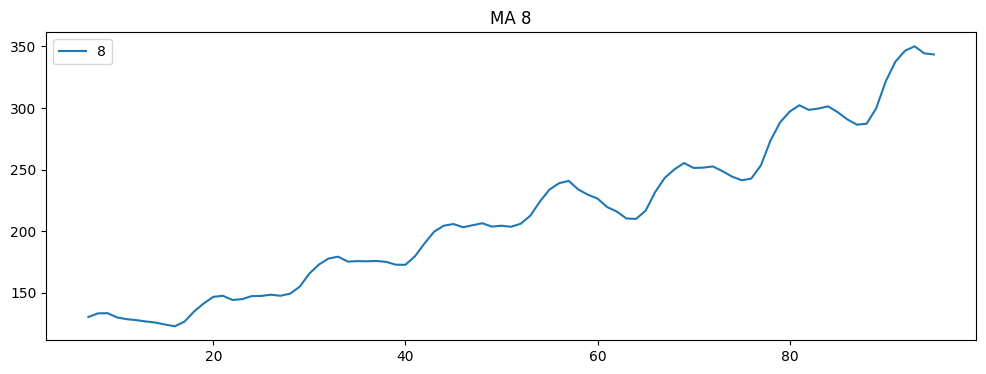

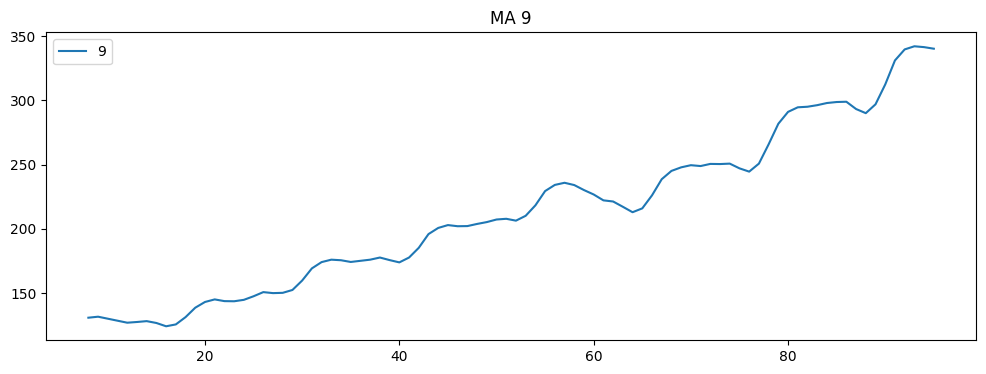

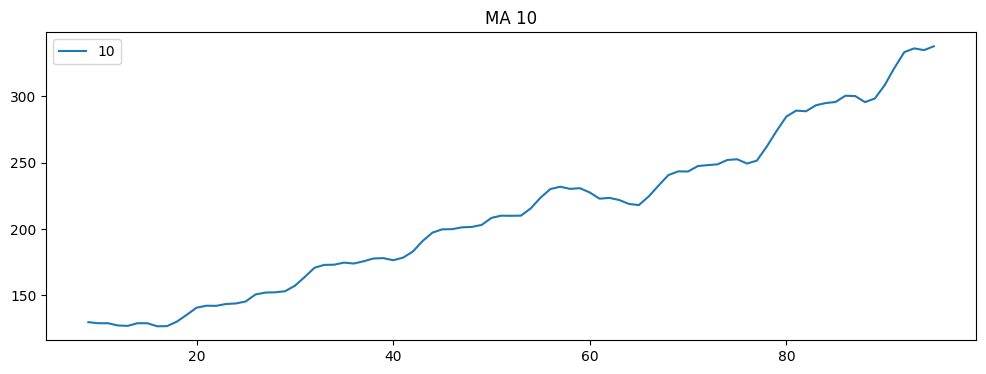

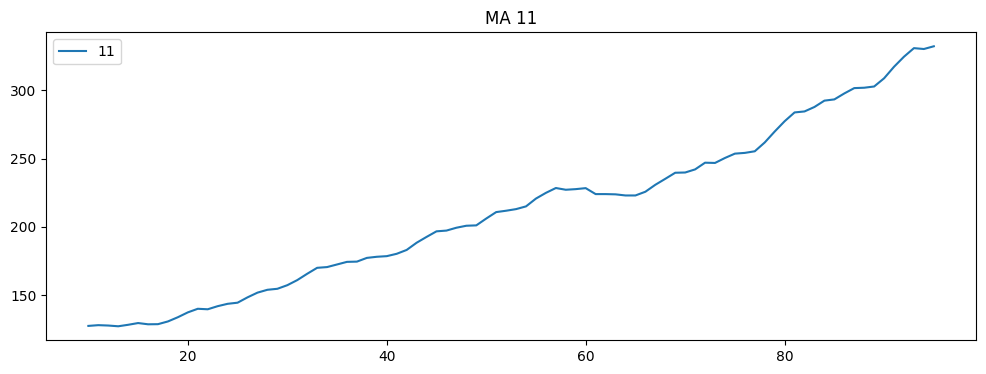

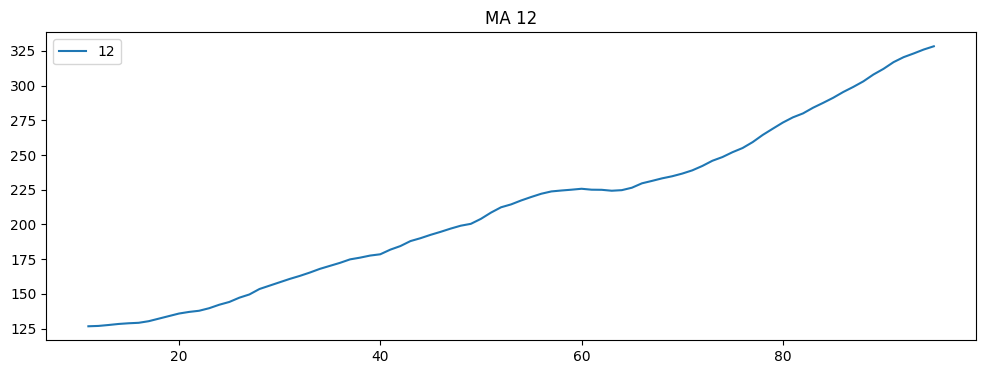

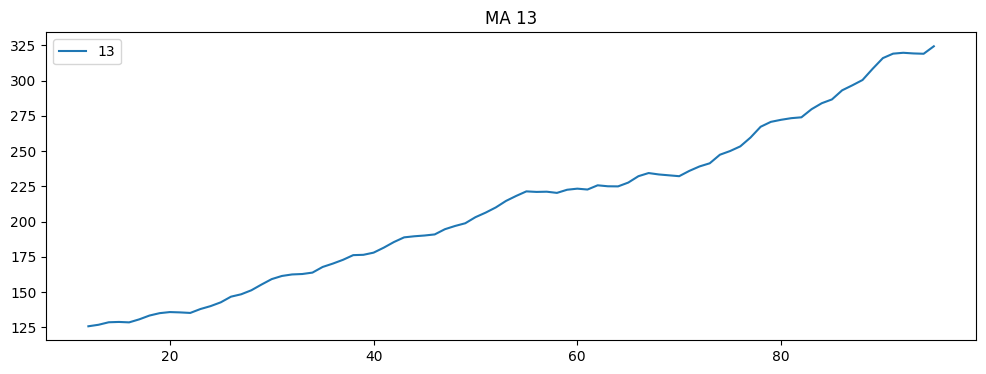

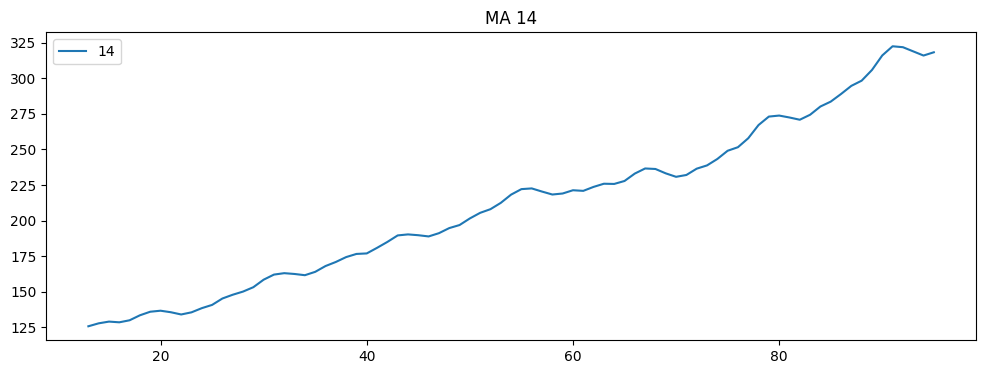

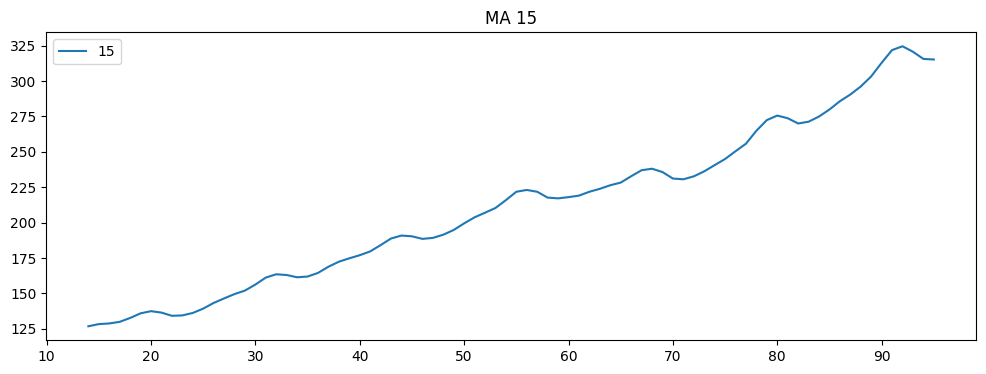

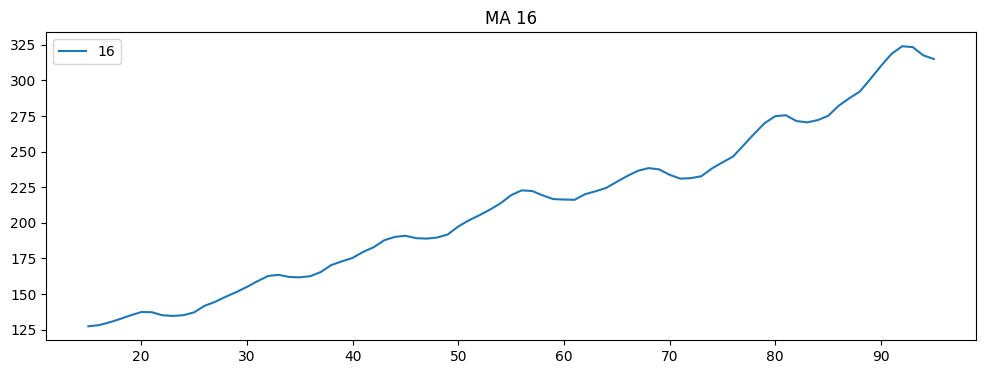

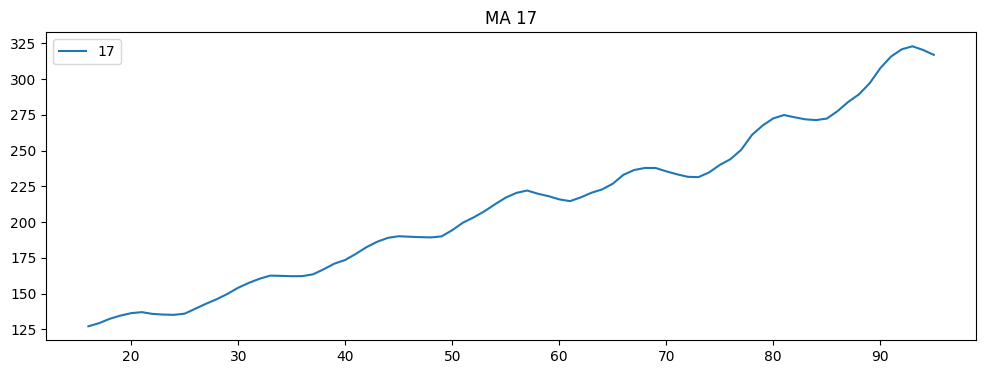

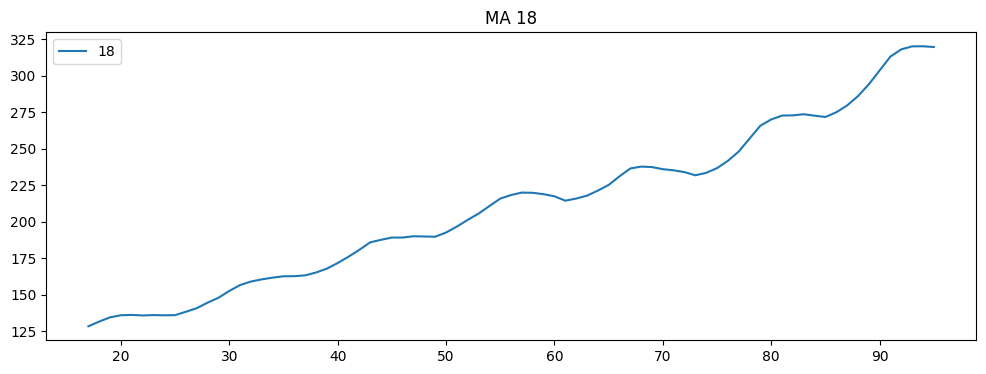

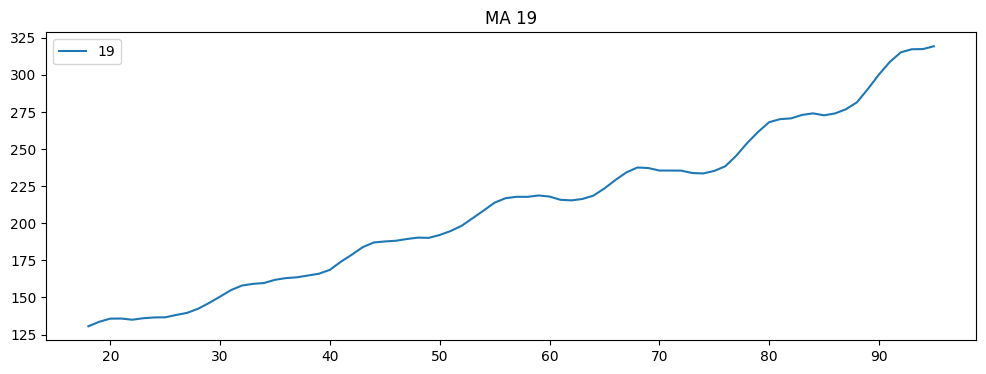

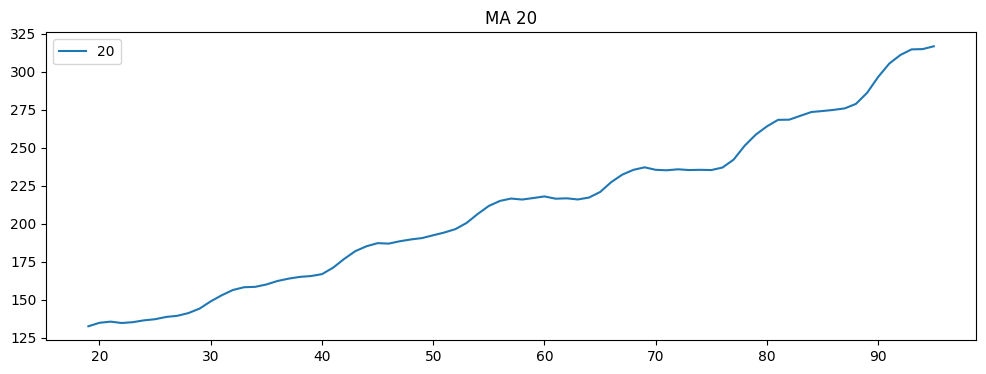

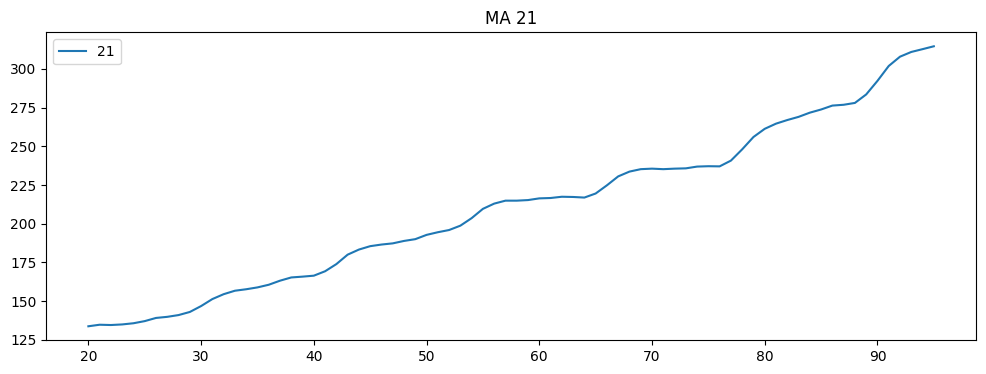

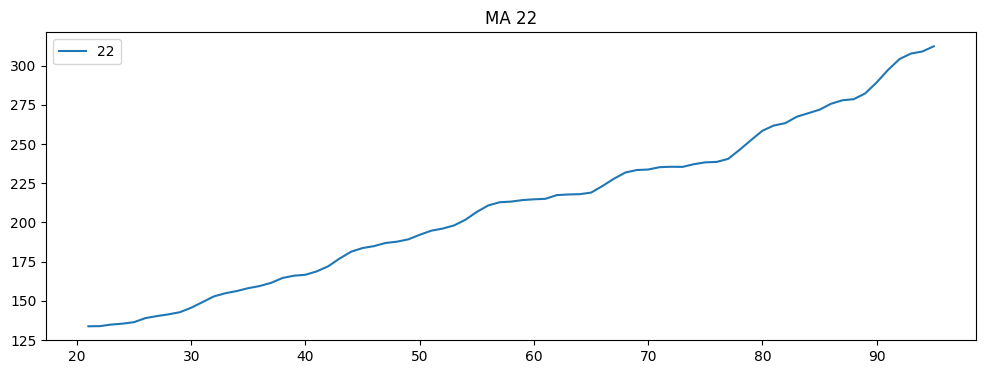

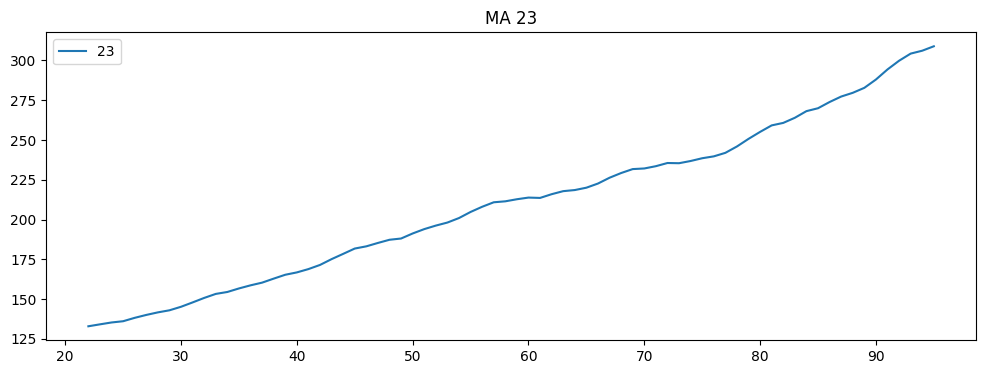

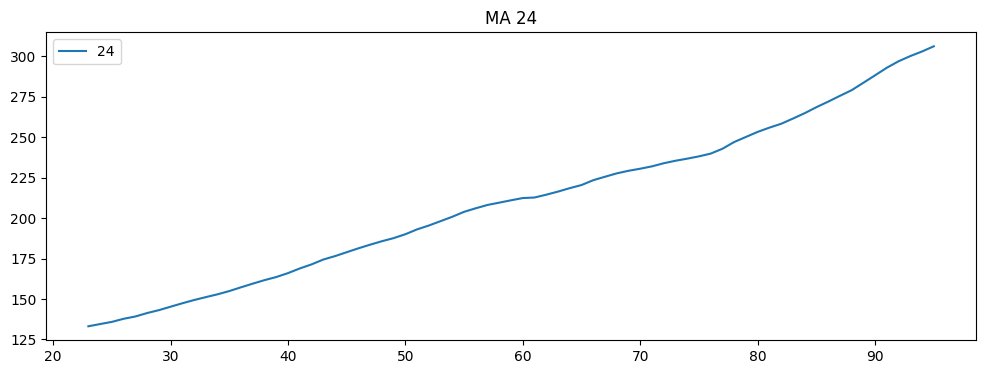

In [ ]:
plt.figure(figsize=(12,4))
Airlines.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,25):
  plt.figure(figsize=(12,4))
  Airlines["Passengers"].rolling(i).mean().plot(label=str(i))
  plt.title("MA "+str(i))
  plt.legend(loc='best')
  plt.show()

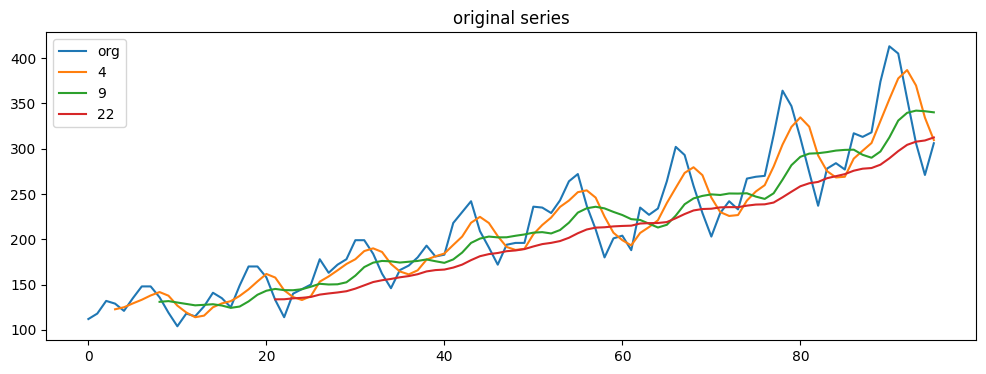

In [ ]:
plt.figure(figsize=(12,4))
Airlines.Passengers.plot(label="org")
plt.title("original series")

for i in (4,9,22):
  Airlines["Passengers"].rolling(i).mean().plot(label=str(i))
  plt.legend(loc='best')

# Time Series Decomosition plot

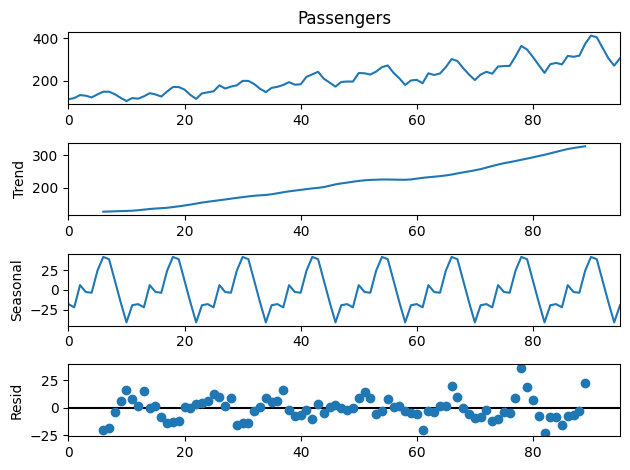

In [ ]:
decomposed_data=seasonal_decompose(Airlines["Passengers"],period=12)
decomposed_data.plot()
plt.show()

# ACF and PACF plots

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


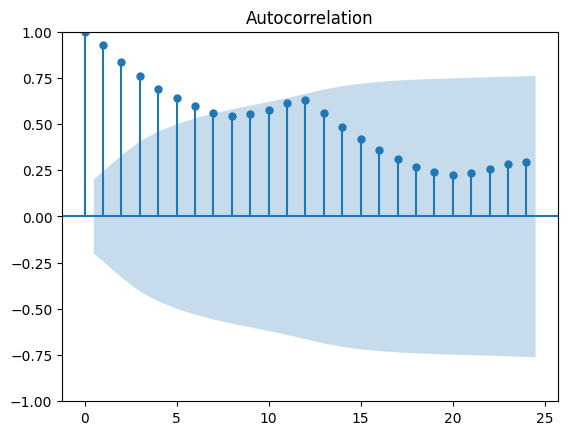

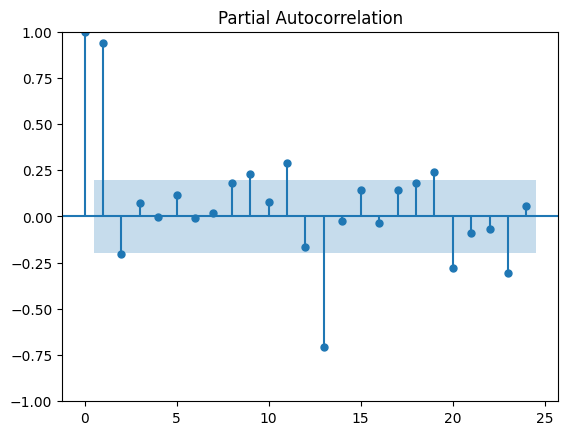

In [ ]:
tsa_plots.plot_acf(Airlines.Passengers,lags=24)
tsa_plots.plot_pacf(Airlines.Passengers,lags=24)
plt.show()

# EXPONENTIAL METHODS

# Evaluation Metric Mape

In [ ]:
def MAPE(pred,orig):
  temp=np.abs((pred-orig)/pred)*100
  return np.mean(temp)

# Simple Exponential Smoothing

In [ ]:
Test.index[0]

80

In [ ]:
SES=[]
x=np.linspace(0.1,1,20)
for i in x:
    ses_model=SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start=Test.index[0], end=Test.index[-1])

    score_simple=MAPE(Test["Passengers"],pred_ses)
    SES.append((i,score_simple))
    print("smoothing_level ",i,"-->","MAPE Error",score_simple)

smoothing_level  0.1 --> MAPE Error 14.070185324217181
smoothing_level  0.1473684210526316 --> MAPE Error 11.942611223934831
smoothing_level  0.19473684210526315 --> MAPE Error 11.427104979988897
smoothing_level  0.24210526315789474 --> MAPE Error 10.998789356327375
smoothing_level  0.2894736842105263 --> MAPE Error 11.348939160959226
smoothing_level  0.33684210526315794 --> MAPE Error 12.374908837604295
smoothing_level  0.38421052631578945 --> MAPE Error 13.509881636051134
smoothing_level  0.43157894736842106 --> MAPE Error 14.470778072350654
smoothing_level  0.4789473684210527 --> MAPE Error 15.276083420676967
smoothing_level  0.5263157894736842 --> MAPE Error 15.942777673379297
smoothing_level  0.5736842105263158 --> MAPE Error 16.486180291757798
smoothing_level  0.6210526315789474 --> MAPE Error 16.919726545127396
smoothing_level  0.6684210526315789 --> MAPE Error 17.25495466670765
smoothing_level  0.7157894736842105 --> MAPE Error 17.50169894763423
smoothing_level  0.7631578947368

In [ ]:
SEM=pd.DataFrame(SES,columns=["smoothing_level","score"])
SEM.sort_values(["score"])

,smoothing_level,score
3,0.242105,10.998789
4,0.289474,11.348939
2,0.194737,11.427105
1,0.147368,11.942611
5,0.336842,12.374909
6,0.384211,13.509882
0,0.100000,14.070185
7,0.431579,14.470778
8,0.478947,15.276083
9,0.526316,15.942778


In [ ]:
ses_model=SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.242105)
pred_ses = ses_model.predict(start=Test.index[0], end=Test.index[-1])

# Double Exponential Method(Holt Method)

In [ ]:
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)

        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

        score=MAPE(pred_hw,Test.Passengers)
        #print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))
        errors_sorted = sorted(l, key=lambda x: x[2])

for score, i, j in errors_sorted:
   print(f"smoothing_level {i:.2f}, smoothing_slope {j:.2f} --> MAPE Error {score:.2f}")

<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fi

smoothing_level 0.10, smoothing_slope 10.94 --> MAPE Error 0.10
smoothing_level 0.19, smoothing_slope 11.95 --> MAPE Error 0.10
smoothing_level 0.10, smoothing_slope 13.74 --> MAPE Error 0.19
smoothing_level 0.28, smoothing_slope 14.20 --> MAPE Error 0.10
smoothing_level 0.91, smoothing_slope 15.00 --> MAPE Error 0.91
smoothing_level 0.82, smoothing_slope 16.11 --> MAPE Error 0.91
smoothing_level 0.37, smoothing_slope 16.96 --> MAPE Error 0.10
smoothing_level 0.10, smoothing_slope 17.29 --> MAPE Error 0.28
smoothing_level 0.19, smoothing_slope 17.89 --> MAPE Error 0.19
smoothing_level 0.91, smoothing_slope 19.39 --> MAPE Error 0.82
smoothing_level 0.46, smoothing_slope 20.27 --> MAPE Error 0.10
smoothing_level 0.73, smoothing_slope 20.73 --> MAPE Error 0.91
smoothing_level 0.10, smoothing_slope 20.82 --> MAPE Error 0.37
smoothing_level 0.55, smoothing_slope 22.87 --> MAPE Error 0.10
smoothing_level 0.28, smoothing_slope 23.22 --> MAPE Error 0.19
smoothing_level 0.10, smoothing_slope 23

<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-58-fe749532697f>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fi

In [ ]:
HM=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
HM.sort_values(["score"])

,smoothing_level,smoothing_slope,score
0,0.10,0.10,10.944941
1,0.10,0.19,11.953922
10,0.19,0.10,13.737572
2,0.10,0.28,14.198297
99,0.91,0.91,14.998842
...,...,...,...
26,0.28,0.64,47.826515
27,0.28,0.73,49.893274
29,0.28,0.91,50.001729
28,0.28,0.82,50.597571


In [ ]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.10, smoothing_slope=0.10)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

<ipython-input-60-93340802a02a>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.10, smoothing_slope=0.10)


# Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
HWADD_model=ExponentialSmoothing(Train["Passengers"],trend="add",seasonal="add",seasonal_periods=12).fit()
pred_hwadd=HWADD_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwadd,Test.Passengers)

7.4290439904642165

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
HWMUL_model=ExponentialSmoothing(Train["Passengers"],trend="add",seasonal="mul",seasonal_periods=12).fit()
pred_hwmul=HWMUL_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwmul,Test.Passengers)

3.3870143800376877

## Holts winter exponential smoothing with multiplicative seasonality and Multiplicative trend

In [ ]:
HWMULMUL_model = ExponentialSmoothing(Train["Passengers"], trend="mul", seasonal="mul", seasonal_periods=12).fit()
pred_hwmulmul = HWMULMUL_model.predict(start=Test.index[0], end=Test.index[-1])
score = MAPE(Test["Passengers"], pred_hwmulmul)
print("MAPE Error:", score)

MAPE Error: 1.8506873557356212


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


RMSE score for Each Model

In [ ]:
# calculate RMSE for SES model
rmse_ses = np.sqrt(mean_squared_error(Test.Passengers, pred_ses))
print("SES RMSE:", rmse_ses)

SES RMSE: 48.63255535898823


In [ ]:
# calculate RMSE for Holt's model(Double Exponenetial Model)
rmse_hw = np.sqrt(mean_squared_error(Test.Passengers, pred_hw))
print("Holt's  RMSE:", rmse_hw)

Holt's  RMSE: 43.38045214151119


In [ ]:
# calculate RMSE for Holt's winter model with additive trend and seasonality
rmse_hwadd= np.sqrt(mean_squared_error(Test.Passengers, pred_hwadd))
print("Holt's Winter - Additive Trend and Seasonality RMSE:", rmse_hwadd)

Holt's Winter - Additive Trend and Seasonality RMSE: 26.088263377210858


In [ ]:
# calculate RMSE for Holt's winter model with additive trend and multiplicative seasonality
rmse_hwmul = np.sqrt(mean_squared_error(Test.Passengers, pred_hwmul))
print("Holt's Winter - additive trend and multiplicative seasonality RMSE:", rmse_hwmul)

Holt's Winter - additive trend and multiplicative seasonality RMSE: 14.570952789956896


In [ ]:
# calculate RMSE for Holt's winter model with multiplicative trend and seasonality
rmse_hwmulmul = np.sqrt(mean_squared_error(Test.Passengers, pred_hwmulmul))
print("Holt's Winter - Multiplicative Trend and Seasonality RMSE:", rmse_hwmulmul)

Holt's Winter - Multiplicative Trend and Seasonality RMSE: 7.172560179170359


In [ ]:
RMSE=pd.DataFrame(columns=["Method","RMSE"])
RMSE["Method"]=["SES","Holt's","Holt's Winter  - Additive Trend and Seasonality ","Holt's Winter - additive trend and multiplicative seasonality",
                "Holt's Winter - Multiplicative Trend and Seasonality"]
RMSE["RMSE"]=[rmse_ses,rmse_hw,rmse_hwadd,rmse_hwmul,rmse_hwmulmul]

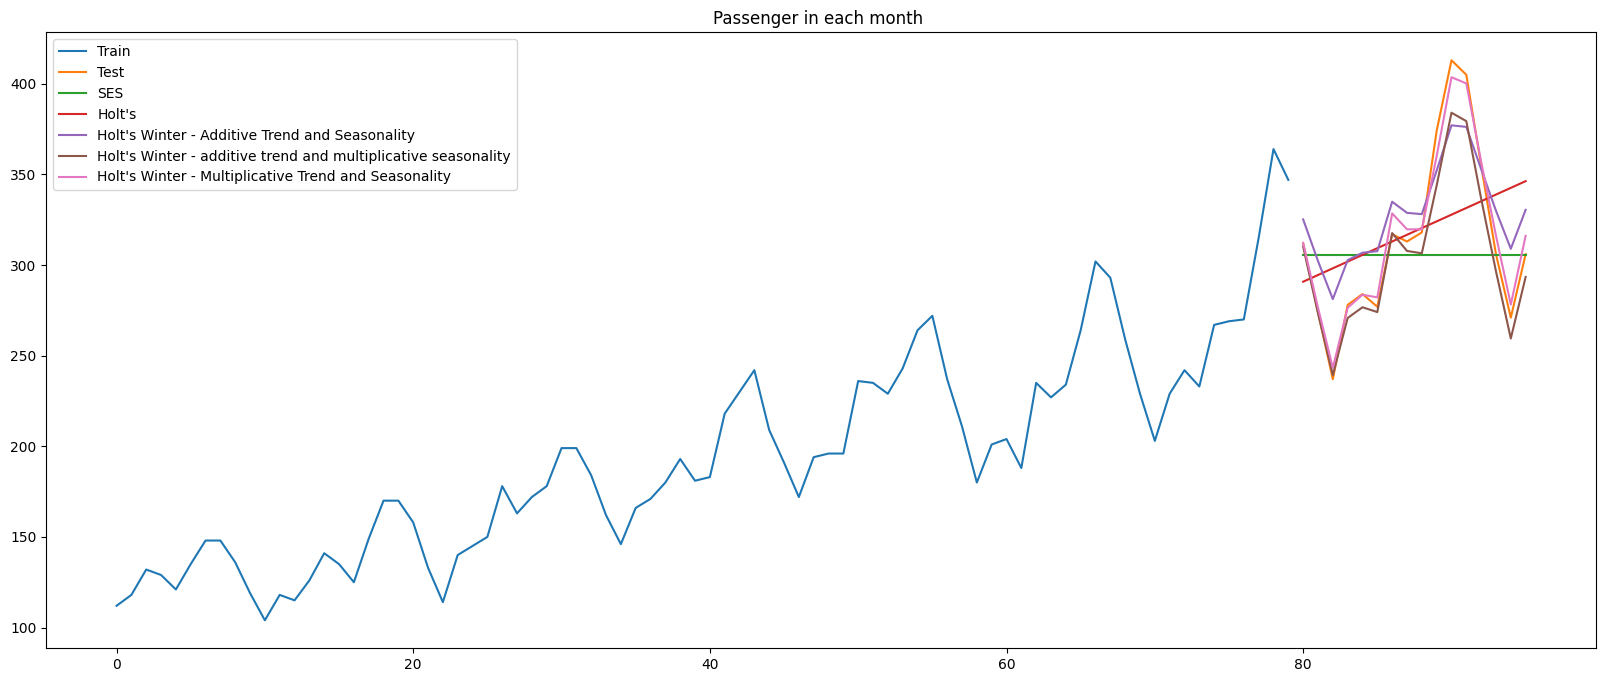

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Passenger in each month ")
plt.plot(Train["Passengers"],label="Train")
plt.plot(Test["Passengers"],label="Test")
plt.plot(pred_ses,label="SES")
plt.plot(pred_hw,label="Holt's")
plt.plot(pred_hwadd,label="Holt's Winter - Additive Trend and Seasonality ")
plt.plot(pred_hwmul,label="Holt's Winter - additive trend and multiplicative seasonality")
plt.plot(pred_hwmulmul,label="Holt's Winter - Multiplicative Trend and Seasonality")
plt.legend(loc="best")

(80.0, 100.0)

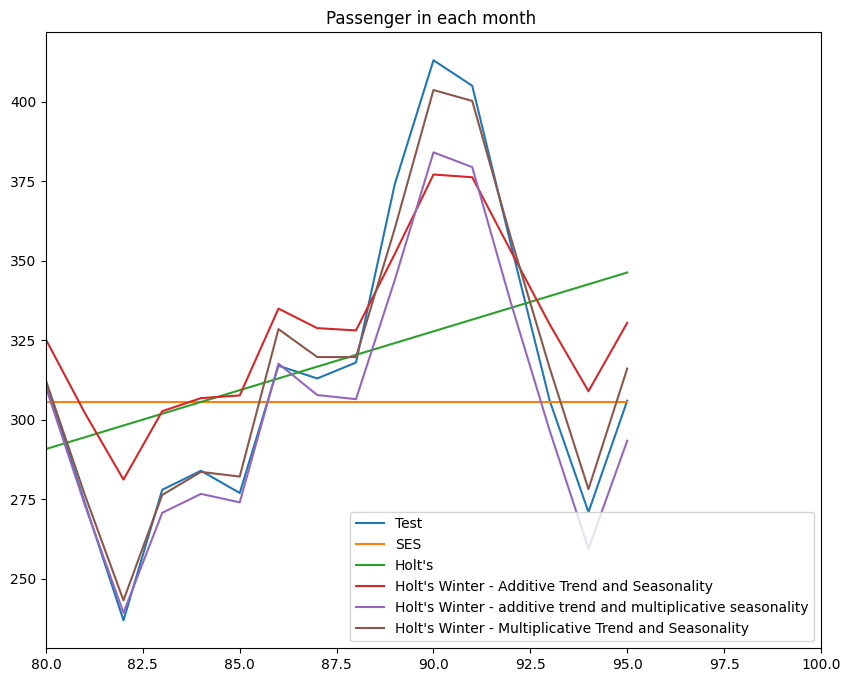

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Passenger in each month ")
plt.plot(Test["Passengers"],label="Test")
plt.plot(pred_ses,label="SES")
plt.plot(pred_hw,label="Holt's")
plt.plot(pred_hwadd,label="Holt's Winter - Additive Trend and Seasonality ")
plt.plot(pred_hwmul,label="Holt's Winter - additive trend and multiplicative seasonality")
plt.plot(pred_hwmulmul,label="Holt's Winter - Multiplicative Trend and Seasonality")
plt.legend(loc="best")
plt.xlim(80,100)

In [ ]:
RMSE

,Method,RMSE
0,SES,48.632555
1,Holt's,43.380452
2,Holt's Winter - Additive Trend and Seasonality,26.088263
3,Holt's Winter - additive trend and multiplicat...,14.570953
4,Holt's Winter - Multiplicative Trend and Seaso...,7.172560


#Model Based Forcasting Models

In [ ]:
def adf_test(Data):
  result=adfuller(Data)
  ''' perform Augmented Dickey Fuller Test on Given Data Set'''
  labels=["ADF test statistic","p-value","# lags used","# obsesrvations"]
  out = pd.Series(result[0:4], index=labels)

  if result[1]<=0.05:
      print('The time series is likely stationary.')
  else:
      print('The time series is likely non-stationary.')

In [ ]:
adfuller(Airlines["Passengers"])

(1.3402479596467138,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [ ]:
adf_test(Airlines["Passengers"])

The time series is likely non-stationary.


In [ ]:
Transform=pd.DataFrame()

#### LOG Transform

In [ ]:
Transform["LOG TRFM"]=np.log(Airlines["Passengers"])

In [ ]:
Transform["LOG TRFM"].head(5)

0    4.718499
1    4.770685
2    4.882802
3    4.859812
4    4.795791
Name: LOG TRFM, dtype: float64

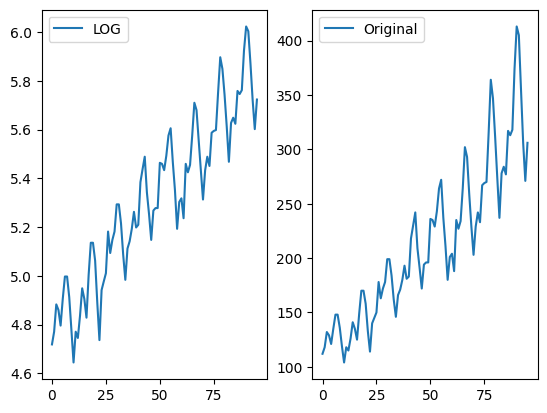

In [ ]:
plt.subplot(121)
plt.plot(Transform["LOG TRFM"],label="LOG")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(Airlines["Passengers"],label="Original")
plt.legend(loc="best")
plt.show()

In [ ]:
adfuller(Transform["LOG TRFM"])

(-0.7230267542465425,
 0.8406945968114737,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 -257.8406094033169)

In [ ]:
adf_test(Transform["LOG TRFM"])

The time series is likely non-stationary.


#### BOX COX Transformation

In [ ]:
Airlines1 = Airlines.copy()
Airlines1.set_index('Date',inplace=True)
Airlines1.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

,Passengers
Date,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


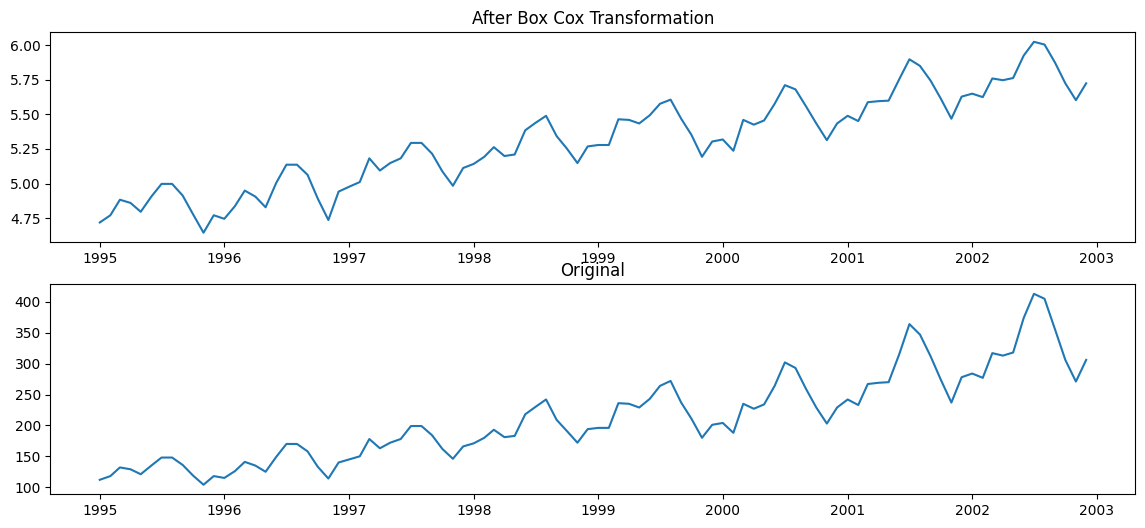

In [ ]:
BOXCOX= pd.DataFrame()
BOXCOX['Passengers'] = pd.Series(boxcox(Airlines1['Passengers'], lmbda=0), Airlines1.index)
display(BOXCOX.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(BOXCOX)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(Airlines1["Passengers"], label='original')
axis[1].set_title('Original')
plt.show()

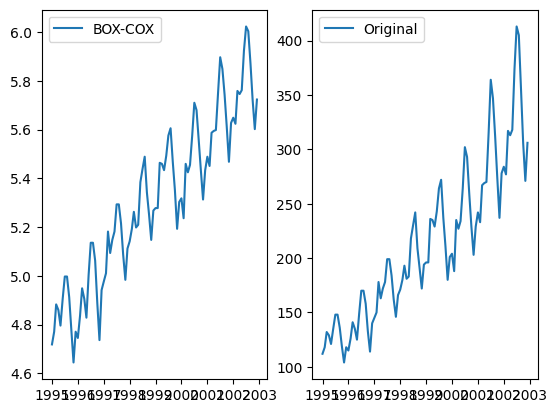

In [ ]:
plt.subplot(121)
plt.plot(BOXCOX['Passengers'],label="BOX-COX")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(Airlines1["Passengers"],label="Original")
plt.legend(loc="best")
plt.show()

In [ ]:
adfuller(BOXCOX['Passengers'])

(-0.7230267542465425,
 0.8406945968114737,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 -257.8406094033169)

In [ ]:
adf_test(BOXCOX['Passengers'])

The time series is likely non-stationary.


#### Differencing BOX-COX Transformations

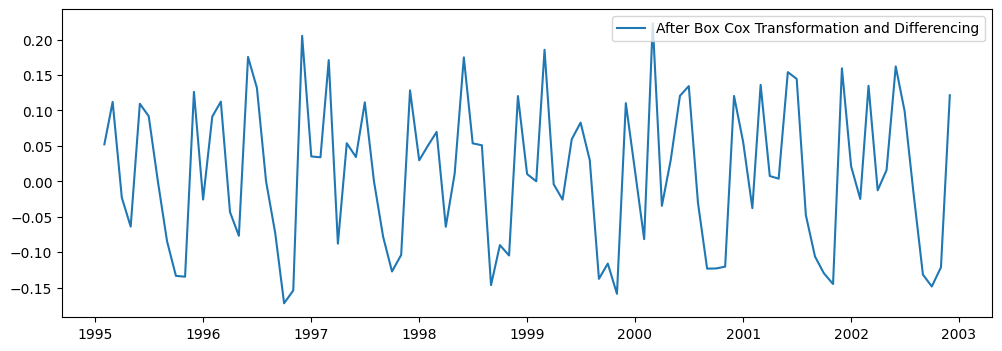

In [ ]:
dif_boxcox = BOXCOX - BOXCOX.shift()
dif_boxcox .dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(dif_boxcox , label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

In [ ]:
dif_boxcox

,Passengers
Date,
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990
1995-05-01,-0.064022
1995-06-01,0.109484
...,...
2002-08-01,-0.019561
2002-09-01,-0.131769
2002-10-01,-0.148533


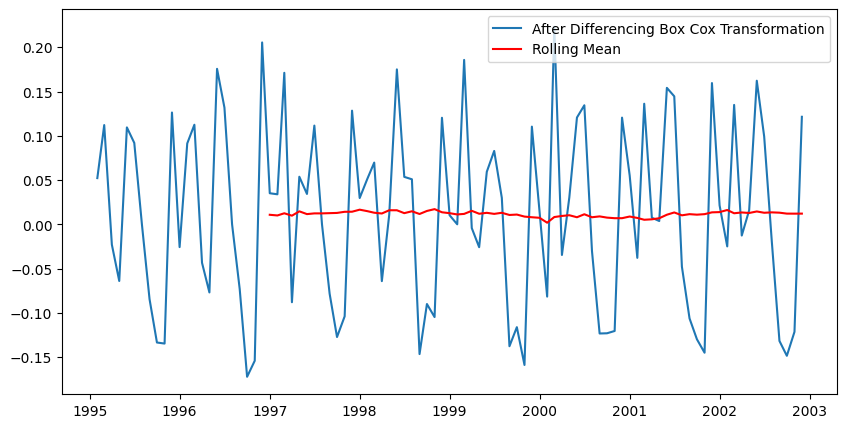

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(dif_boxcox, label='After Differencing Box Cox Transformation')
rolling_mean = dif_boxcox.rolling(window=24).mean()
plt.plot(rolling_mean,c='r',label="Rolling Mean")
plt.legend(loc='best')
plt.show()

In [ ]:
dif_boxcox.mean()

Passengers    0.01058
dtype: float64

In [ ]:
adfuller(dif_boxcox)

(-2.670822890269434,
 0.079224690566299,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -259.34387684331466)

In [ ]:
adf_test(dif_boxcox)

The time series is likely non-stationary.


In [ ]:
Airlines1

,Passengers,month,year
Date,,,
1995-01-01,112,Jan,1995
1995-02-01,118,Feb,1995
1995-03-01,132,Mar,1995
1995-04-01,129,Apr,1995
1995-05-01,121,May,1995
...,...,...,...
2002-08-01,405,Aug,2002
2002-09-01,355,Sep,2002
2002-10-01,306,Oct,2002


#### Grid Search CV To find ARIMA Parameters

In [ ]:
# grid search ARIMA parameters for a time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
evaluate_models(dif_boxcox.Passengers, p_values, d_values, q_values)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

Best ARIMA(4, 1, 4) RMSE=0.073


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#dif_boxcox

In [ ]:
int(len(BOXCOX) * 0.70)

67

In [ ]:
size=67
train_boxcox = BOXCOX[:size]
test_boxcox = BOXCOX[size:]
train_data_boxcox_diff = dif_boxcox[:size]
test_data_boxcox_diff =dif_boxcox[size:]

In [ ]:
# load data
data = dif_boxcox.Passengers
# prepare data
X = data.values
X = X.astype('float32')

### Model building ARIMA

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = dif_boxcox.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(dif_boxcox.index.min(), dif_boxcox.index.max())
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(BOXCOX.Passengers[0])
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
train_data=Airlines1.iloc[:80]
test_data=Airlines1.iloc[80:]

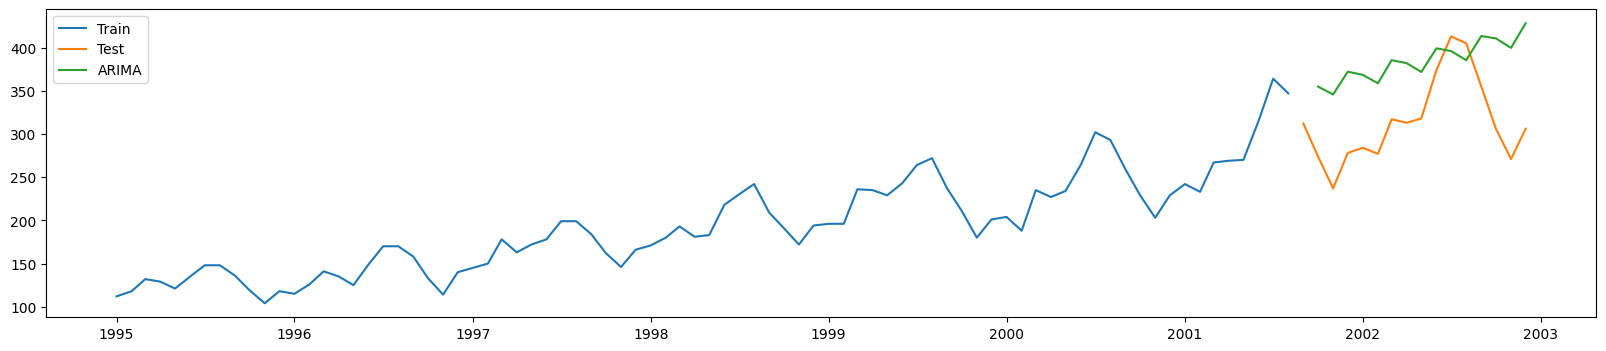

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(train_data["Passengers"], label='Train')
plt.plot(test_data["Passengers"], label='Test')
plt.plot(y_hat_ar['arima_forecast'][Test.index.min():], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse_ARIMA =  np.sqrt(mean_squared_error(Test.Passengers, y_hat_ar['arima_forecast'][Test.index.min()-1:]))
rmse_ARIMA

80.10474786483066

In [ ]:
model_residual = model_fit.resid

In [ ]:
adfuller(model_residual)

(-1.7413037464887438,
 0.4099669313928074,
 11,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 -132.99591945662644)

In [ ]:
adf_test(model_residual)

The time series is likely non-stationary.


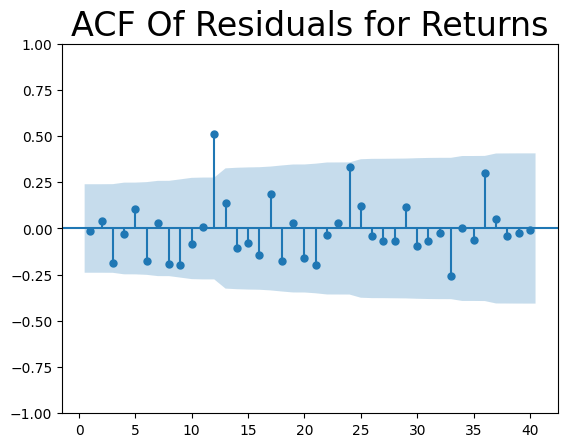

In [ ]:
tsa_plots.plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

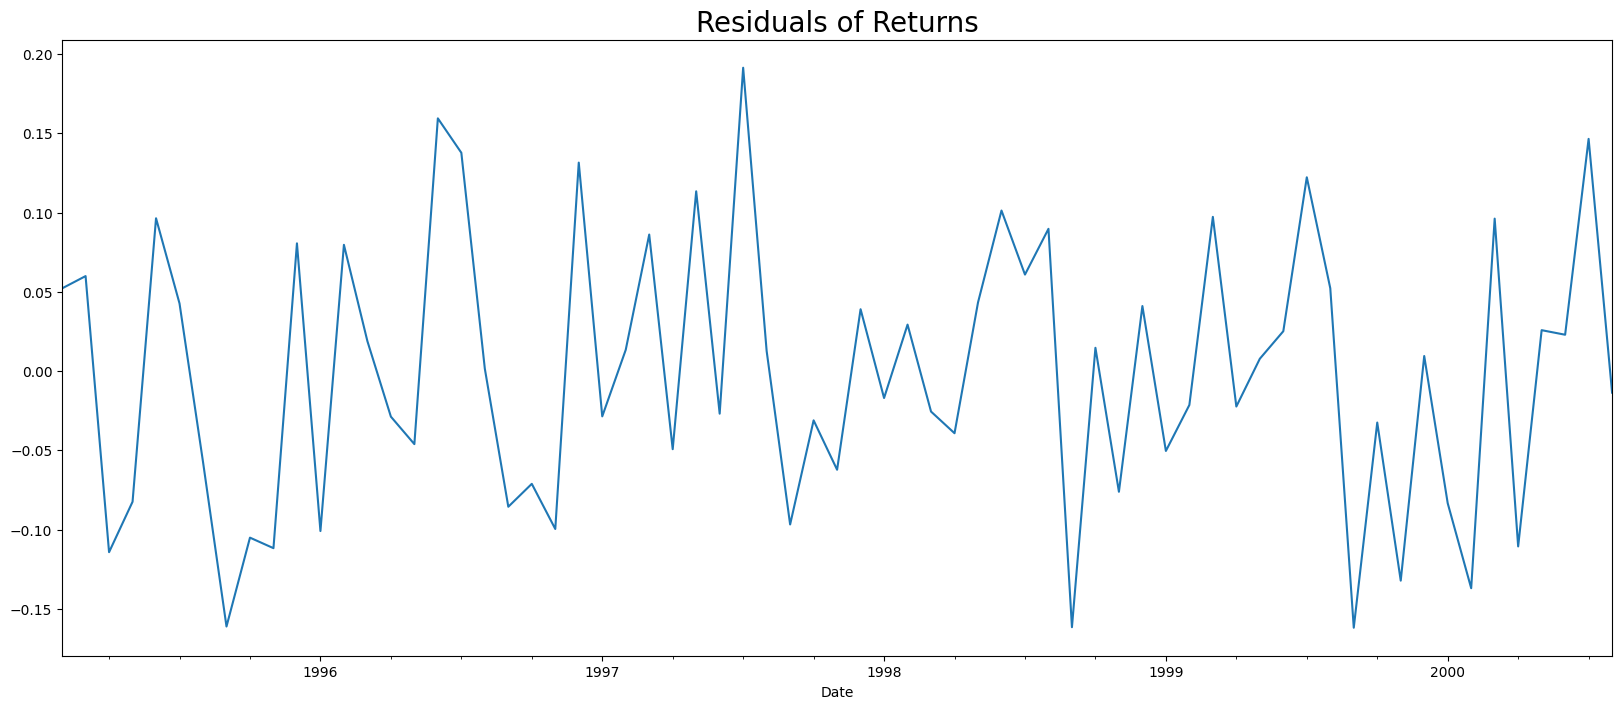

In [ ]:
model_residual.plot(figsize=(20,8))
plt.title("Residuals of Returns", size=20)
plt.show()

### SARIMA

#### Model building SARIMA

In [ ]:
model = SARIMAX(train_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = dif_boxcox.copy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(dif_boxcox.index.min(),dif_boxcox.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

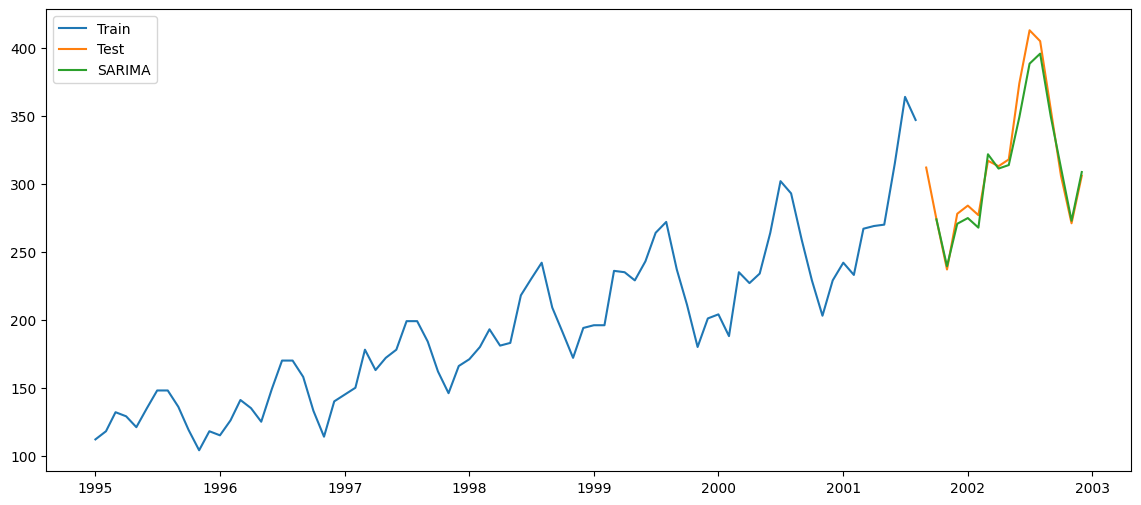

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data["Passengers"], label='Train')
plt.plot(test_data["Passengers"], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][Test.index.min():], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse_SARIMA = np.sqrt(mean_squared_error(Test.Passengers, y_hat_sarima['sarima_forecast'][Test.index.min()-1:]))
rmse_SARIMA

10.229591816090704

In [ ]:
model_residual = model_fit.resid
model_residual.mean()

0.0390830359820338

In [ ]:
adf_test(model_residual)

The time series is likely stationary.


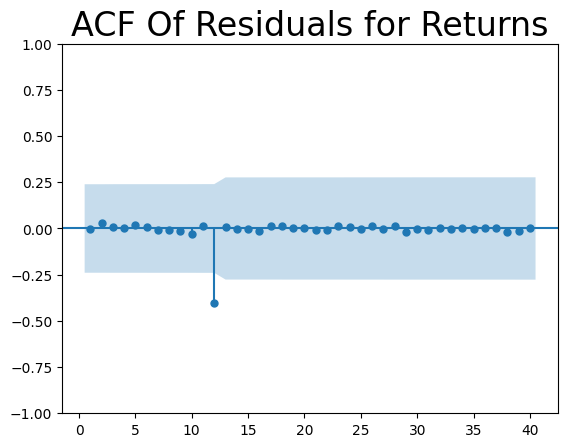

In [ ]:
tsa_plots.plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

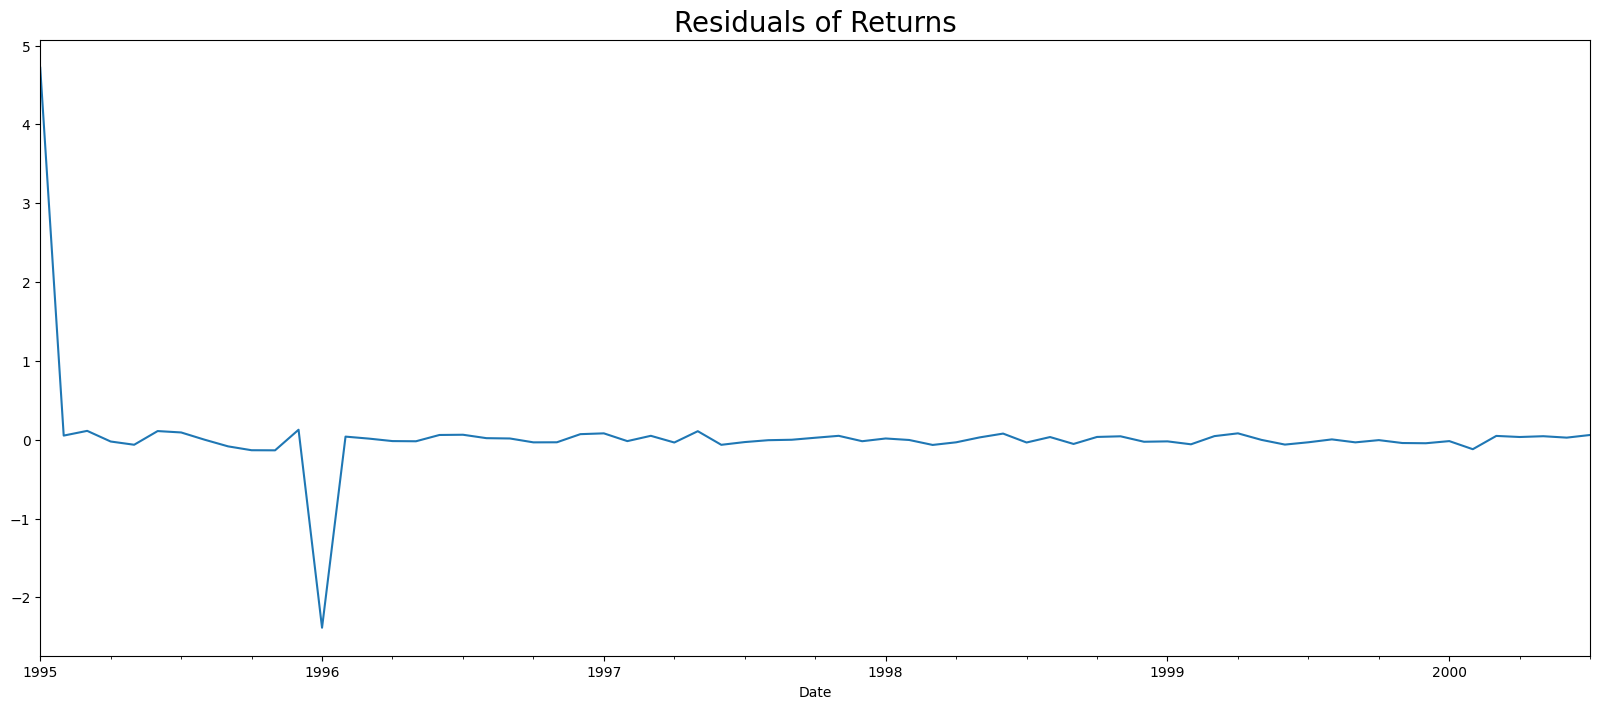

In [ ]:
model_residual.plot(figsize=(20,8))
plt.title("Residuals of Returns", size=20)
plt.show()

# Naive Model

In [ ]:
Data=pd.read_excel("Airlines+Data.xlsx")

In [ ]:
Data.rename({'Month':'Date'},axis=1, inplace=True)

In [ ]:
Airline=Data.copy()

<Axes: ylabel='Density'>

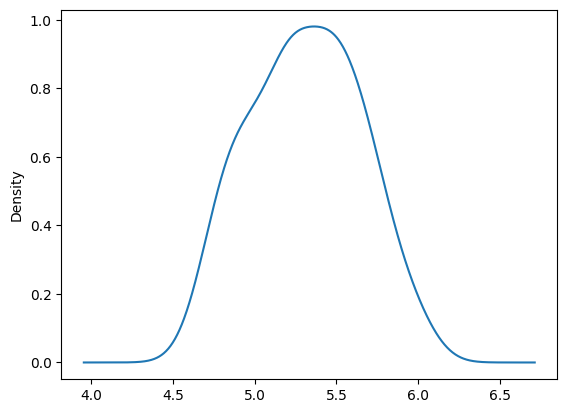

In [ ]:
np.log(Airline["Passengers"]).plot(kind='kde')

#### Creating Dummy variables

In [ ]:
Airline.reset_index(inplace=True)
Airline['t'] = np.arange(1,len(Airline)+1)
Airline['t_squared'] = np.square(Airline.t)
Airline["month"] = Airline.Date.dt.strftime("%b")
Airline["year"] = Airline.Date.dt.strftime("%Y")
months=pd.get_dummies(Airlines["month"])## Creating Dummie variables for month
month=months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
Airline = pd.concat([Airline,months],axis=1)
Airline['log_passengers'] = np.log(Airline['Passengers'])
Airline

,index,Date,Passengers,t,t_squared,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_passengers
0,0,1995-01-01,112,1,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.718499
1,1,1995-02-01,118,2,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.770685
2,2,1995-03-01,132,3,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,4.882802
3,3,1995-04-01,129,4,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.859812
4,4,1995-05-01,121,5,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,2002-08-01,405,92,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,6.003887
92,92,2002-09-01,355,93,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,5.872118
93,93,2002-10-01,306,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.723585
94,94,2002-11-01,271,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.602119


#### Train Test Split

In [ ]:
trn=Airline.iloc[:80]
tst=Airline.iloc[80:]

# Linear Model

In [ ]:
linear_model = smf.ols('Passengers~t',data=trn).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(tst['t'])))
rmse_linear = np.sqrt(np.mean((np.array(tst['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726805

In [ ]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     281.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.38e-27
Time:                        23:55:14   Log-Likelihood:                -375.56
No. Observations:                  80   AIC:                             755.1
Df Residuals:                      78   BIC:                             759.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.3392      6.048     17.416      0.000      93.298     117.381
t              2.1756      0.130     16.769      0.000       1.917       2.434
==============================================================================
Omnibus:                        5.011   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.256
Skew:                           0.463   Prob(JB):                        0.119
Kurtosis:                       3.649   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exponential Model

In [ ]:
exp_model = smf.ols('log_passengers~t',data=trn).fit()
pred_exp =  pd.Series(exp_model.predict(pd.DataFrame(tst['t'])))
rmse_exp = np.sqrt(np.mean((np.array(tst['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

43.79373939334308

In [ ]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     350.9
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.34e-30
Time:                        23:55:14   Log-Likelihood:                 53.563
No. Observations:                  80   AIC:                            -103.1
Df Residuals:                      78   BIC:                            -98.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7621      0.028    168.169      0.000       4.706       4.818
t              0.0114      0.001     18.731      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.306   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.634
Skew:                          -0.135   Prob(JB):                        0.442
Kurtosis:                       2.354   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Quadratic Model

In [ ]:
qdrtc_model = smf.ols('Passengers~t+t_squared',data=trn).fit()
pred_qdrtc =  pd.Series(qdrtc_model .predict(pd.DataFrame(tst[['t',"t_squared"]])))
rmse_qdrtc = np.sqrt(np.mean((np.array(tst['Passengers'])-np.array(np.array(pred_qdrtc)))**2))
rmse_qdrtc

43.65440369584204

In [ ]:
qdrtc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           5.55e-27
Time:                        23:55:14   Log-Likelihood:                -373.84
No. Observations:                  80   AIC:                             753.7
Df Residuals:                      77   BIC:                             760.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    117.9532      9.079     12.992      0.000      99.874     136.032
t              1.2526      0.517      2.421      0.018       0.222       2.283
t_squared      0.0114      0.006      1.841      0.069      -0.001       0.024
==============================================================================
Omnibus:                        1.568   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.090
Skew:                           0.274   Prob(JB):                        0.580
Kurtosis:                       3.165   Cond. No.                     8.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Additive Seasonality

In [ ]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=trn).fit()
pred_add_sea = pd.Series(add_sea.predict(tst[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(tst['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.266476414433

In [ ]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.661
Date:                Sun, 23 Jul 2023   Prob (F-statistic):              0.102
Time:                        23:55:14   Log-Likelihood:                -427.13
No. Observations:                  80   AIC:                             878.3
Df Residuals:                      68   BIC:                             906.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    177.7491      5.658     31.416      0.000     166.459     189.039
Jan           -8.4634     19.835     -0.427      0.671     -48.043      31.116
Feb           -7.6062     19.835     -0.383      0.703     -47.186      31.974
Mar           19.6795     19.835      0.992      0.325     -19.900      59.259
Apr           13.5366     19.835      0.682      0.497     -26.043      53.116
May           12.8223     19.835      0.646      0.520     -26.757      52.402
Jun           36.8223     19.835      1.856      0.068      -2.757      76.402
Jul           61.8223     19.835      3.117      0.003      22.243     101.402
Aug           60.9652     19.835      3.074      0.003      21.385     100.545
Sep           19.4176     21.299      0.912      0.365     -23.084      61.919
Oct           -3.5824     21.299     -0.168      0.867     -46.084      38.919
Nov          -24.5824     21.299     -1.154      0.252     -67.084      17.919
Dec           -3.0824     21.299     -0.145      0.885     -45.584      39.419
==============================================================================
Omnibus:                        4.649   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                2.521
Skew:                           0.181   Prob(JB):                        0.284
Kurtosis:                       2.210   Cond. No.                     2.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multiplicative Seasonality

In [ ]:
mul_sea=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=trn).fit()
pred_mul_sea=pd.Series(mul_sea.predict(tst[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul=np.sqrt(np.mean((np.array(tst['Passengers'])-np.exp(pred_mul_sea))**2))
rmse_mul

135.3264841462107

In [ ]:
mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.491
Date:                Sun, 23 Jul 2023   Prob (F-statistic):              0.155
Time:                        23:55:14   Log-Likelihood:                -5.9692
No. Observations:                  80   AIC:                             35.94
Df Residuals:                      68   BIC:                             64.52
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8172      0.029    164.625      0.000       4.759       4.876
Jan            0.2781      0.103      2.711      0.008       0.073       0.483
Feb            0.2937      0.103      2.863      0.006       0.089       0.498
Mar            0.4381      0.103      4.270      0.000       0.233       0.643
Apr            0.4023      0.103      3.922      0.000       0.198       0.607
May            0.3926      0.103      3.827      0.000       0.188       0.597
Jun            0.5110      0.103      4.981      0.000       0.306       0.716
Jul            0.6182      0.103      6.027      0.000       0.414       0.823
Aug            0.6186      0.103      6.031      0.000       0.414       0.823
Sep            0.4424      0.110      4.016      0.000       0.223       0.662
Oct            0.3153      0.110      2.862      0.006       0.096       0.535
Nov            0.1858      0.110      1.687      0.096      -0.034       0.406
Dec            0.3210      0.110      2.914      0.005       0.101       0.541
==============================================================================
Omnibus:                       31.181   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.582
Skew:                          -0.157   Prob(JB):                       0.0614
Kurtosis:                       1.744   Cond. No.                     2.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Multiplicative additive seasonality

In [ ]:
mul_ad_sea=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=trn).fit()
pred_mul_ad_sea=pd.Series(mul_ad_sea.predict(tst[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_ad=np.sqrt(np.mean((np.array(tst['Passengers'])-np.array(np.exp(pred_mul_ad_sea)))**2))
rmse_mul_ad

9.469000230375238

In [ ]:
mul_ad_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           2.71e-48
Time:                        23:55:14   Log-Likelihood:                 131.77
No. Observations:                  80   AIC:                            -237.5
Df Residuals:                      67   BIC:                            -206.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4003      0.011    413.258      0.000       4.379       4.422
t              0.0112      0.000     45.054      0.000       0.011       0.012
Jan            0.2824      0.018     15.287      0.000       0.246       0.319
Feb            0.2868      0.018     15.527      0.000       0.250       0.324
Mar            0.4201      0.018     22.734      0.000       0.383       0.457
Apr            0.3732      0.018     20.189      0.000       0.336       0.410
May            0.3523      0.018     19.049      0.000       0.315       0.389
Jun            0.4595      0.019     24.828      0.000       0.423       0.496
Jul            0.5556      0.019     29.993      0.000       0.519       0.593
Aug            0.5448      0.019     29.380      0.000       0.508       0.582
Sep            0.4244      0.020     21.389      0.000       0.385       0.464
Oct            0.2861      0.020     14.418      0.000       0.247       0.326
Nov            0.1455      0.020      7.327      0.000       0.106       0.185
Dec            0.2696      0.020     13.566      0.000       0.230       0.309
==============================================================================
Omnibus:                        0.911   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.505
Skew:                          -0.177   Prob(JB):                        0.777
Kurtosis:                       3.163   Cond. No.                     8.50e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
RMSE=pd.DataFrame(columns=["Method","RMSE"])
RMSE["Method"]=["SES","Holt's","Holt's Winter  - Additive Trend and Seasonality ","Holt's Winter - additive trend and multiplicative seasonality",
                "Holt's Winter - Multiplicative Trend and Seasonality","ARIMA","Sarima","Linear_Model","Exponential_Model","Quadratic_model","Additive_Seasonality"
                ,"Multiplicative seasonality","Multiplicative additive seasonality"]
RMSE["RMSE"]=[rmse_ses,rmse_hw,rmse_hwadd,rmse_hwmul,rmse_hwmulmul,rmse_ARIMA,rmse_SARIMA,rmse_linear,rmse_exp,rmse_qdrtc,rmse_add_sea,rmse_mul,rmse_mul_ad]
RMSE.sort_values(by=[ "RMSE"], ascending=[True], inplace=True)

In [ ]:
RMSE.set_index("Method",inplace=True)